In [180]:
import matplotlib

import matplotlib.pyplot as plt
import networkx as nx
import random as rd

n = 5 # number of nodes on one dimension


def initialize():
    global g
    g = nx.grid_2d_graph(n,n)
    g.pos = nx.spring_layout(g, iterations = 5)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos ,node_size = 1)
#     nx.draw(g, node_size = 1)
    plt.show()

def move(x):
    if x[0] == 0:
        x_move = rd.choice([0,1])
    elif x[0] == 4:
        x_move = rd.choice([-1,0])
    else:
        x_move = rd.choice([-1,0,1])
    if x[1] == 0:
        y_move = rd.choice([0,1])
    elif x[1] == 4:
        y_move = rd.choice([-1,0])
    else:
        y_move = rd.choice([-1,0,1])
    return(x_move,y_move)

def update():
    global g
    g.count += 1
    if g.count % 5 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            edge = rd.choice(list(g.edges(i)))
            g.remove_edge(*edge)
            for j in g.neighbors(i):
                nds.remove(j)
            x_move, y_move = move(i)
            neighbor = (i[0] + x_move, i[1] + y_move)
            g.add_edge(i, neighbor)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)


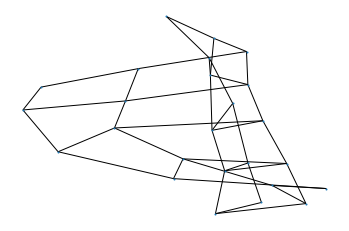

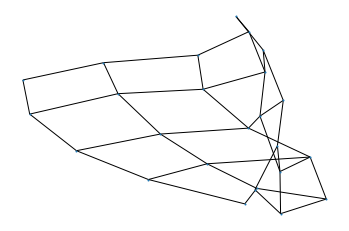

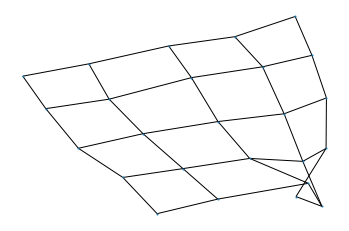

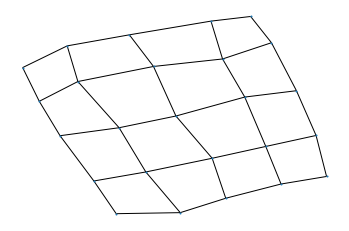

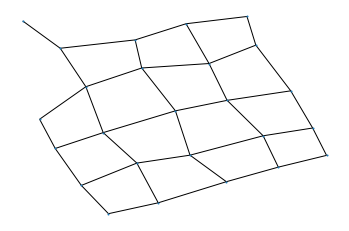

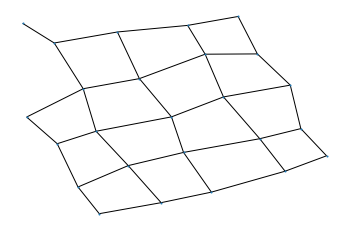

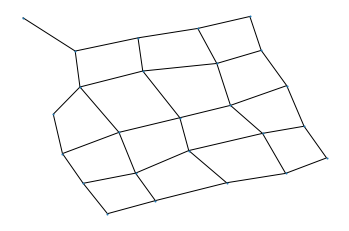

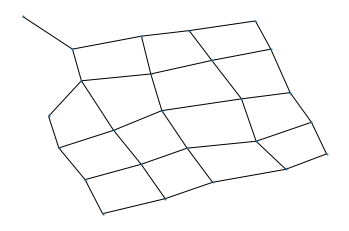

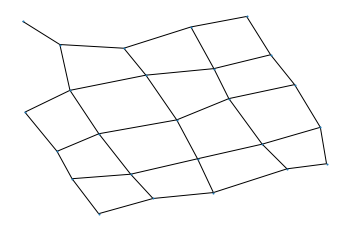

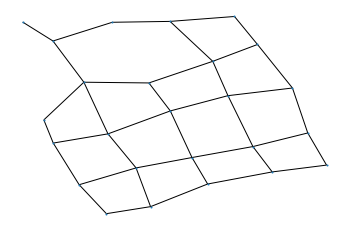

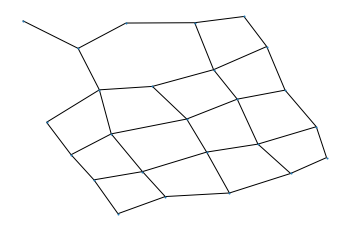

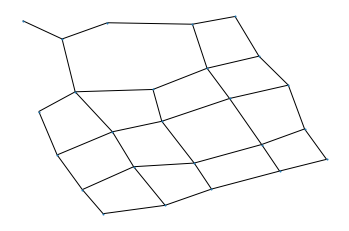

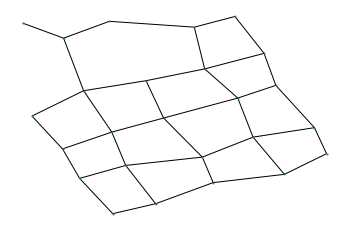

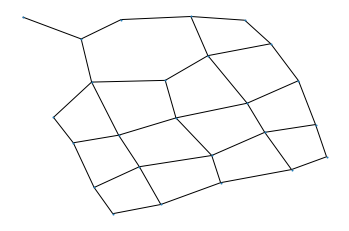

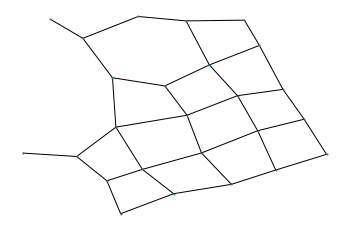

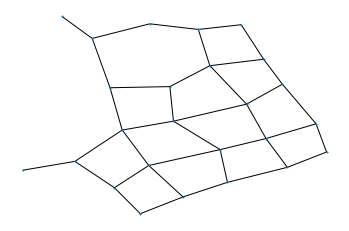

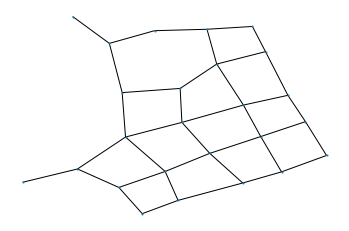

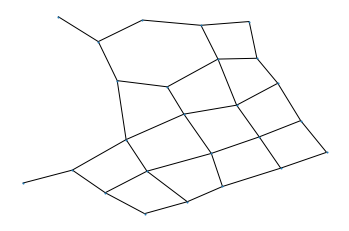

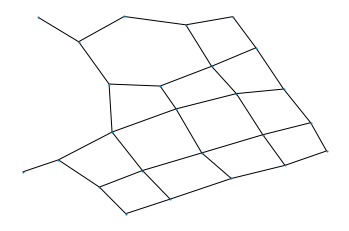

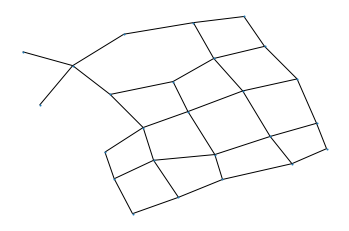

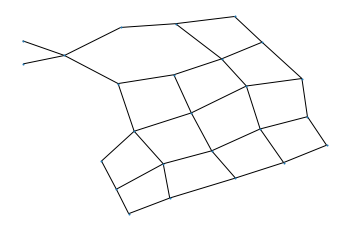

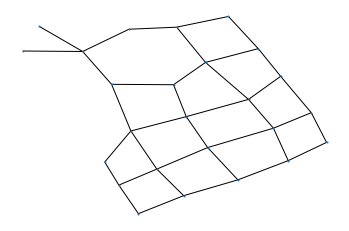

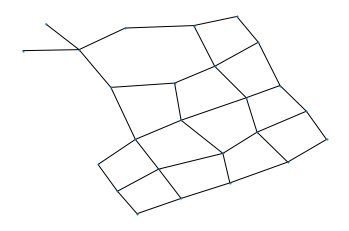

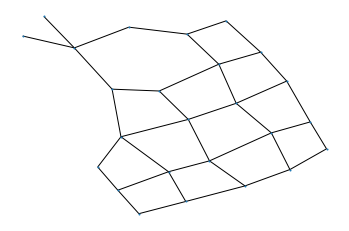

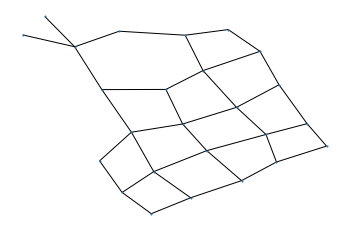

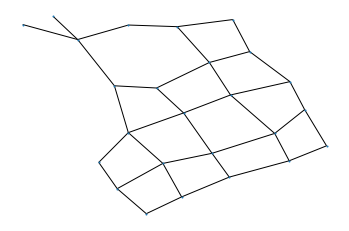

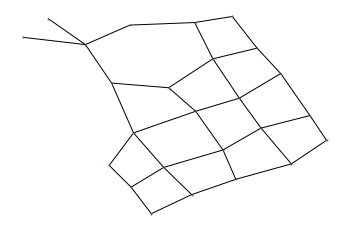

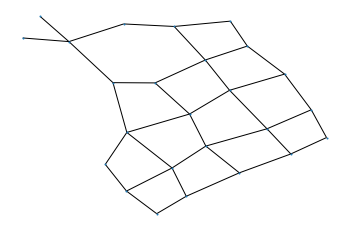

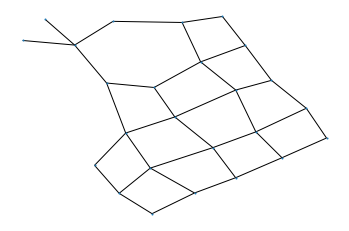

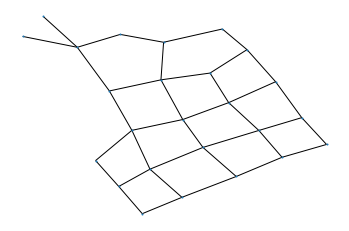

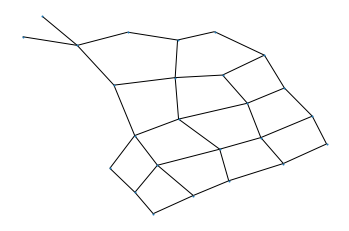

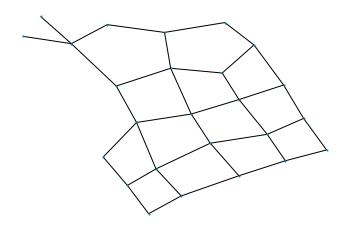

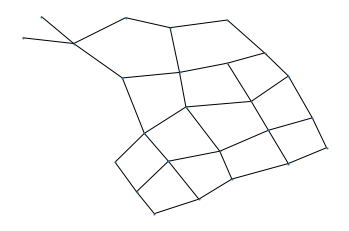

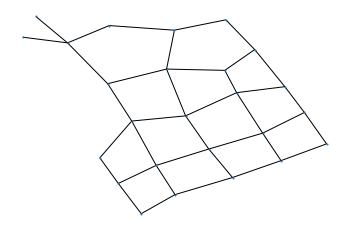

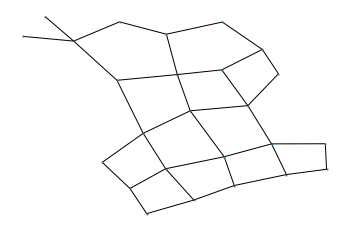

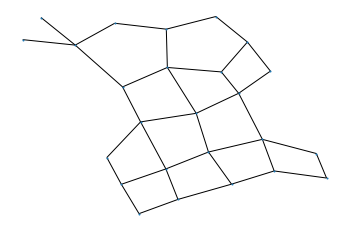

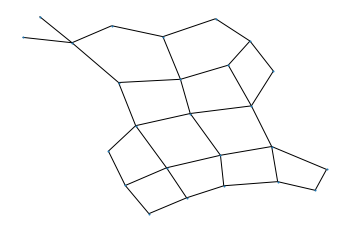

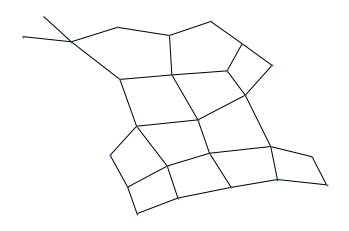

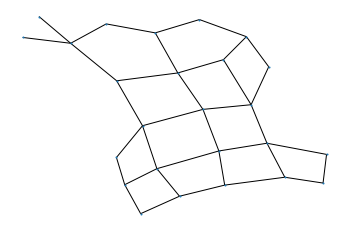

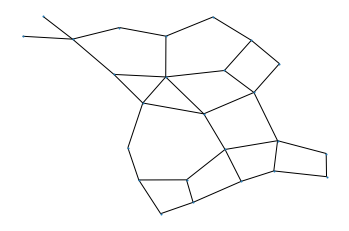

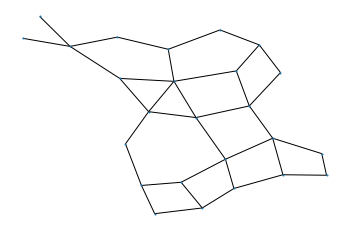

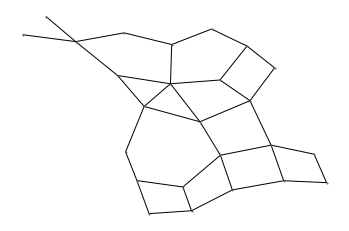

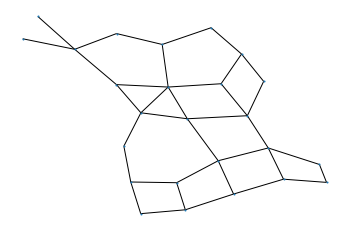

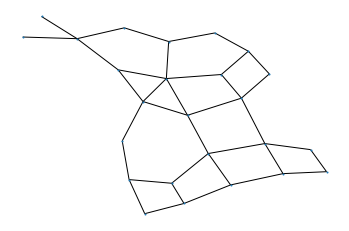

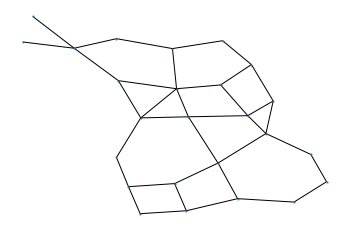

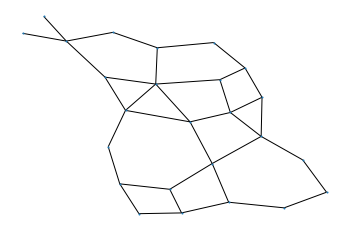

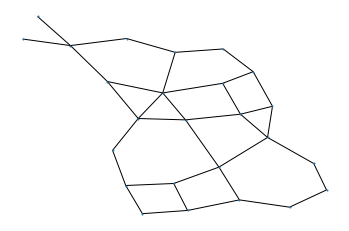

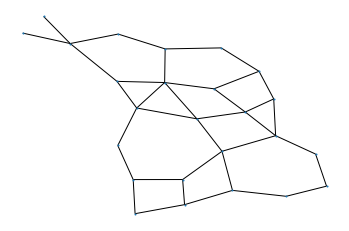

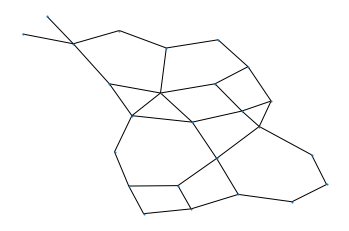

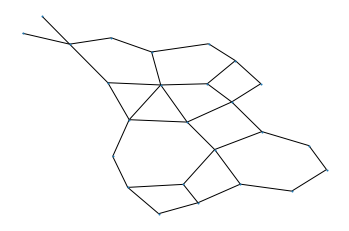

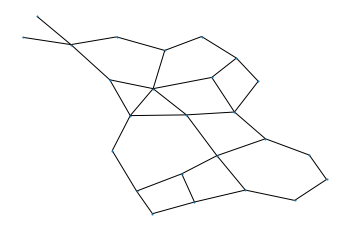

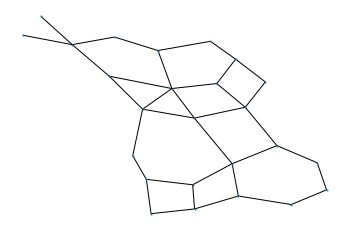

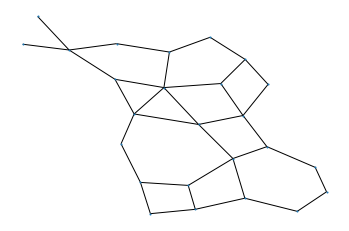

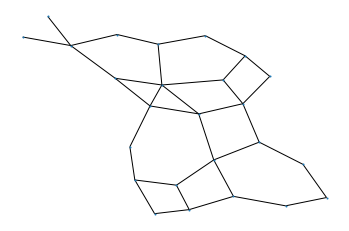

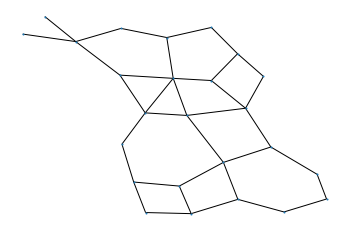

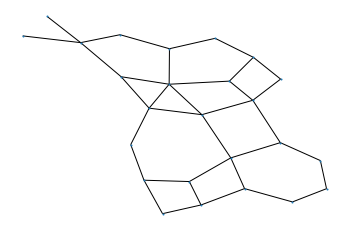

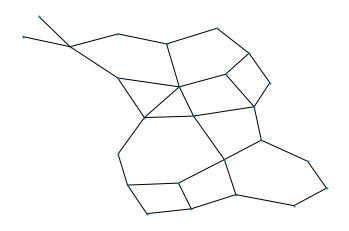

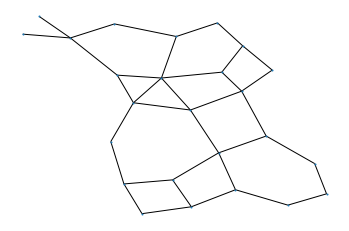

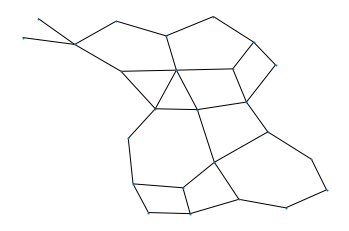

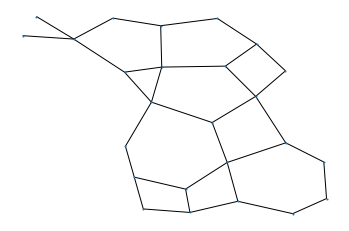

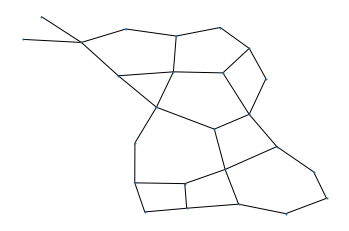

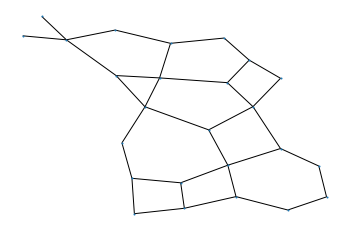

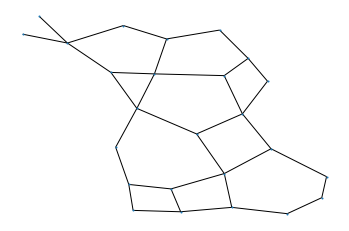

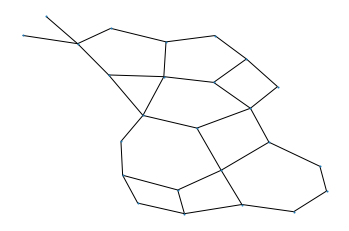

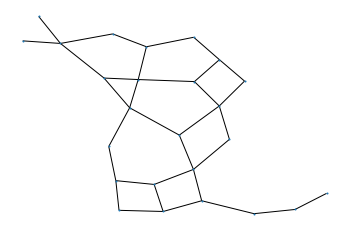

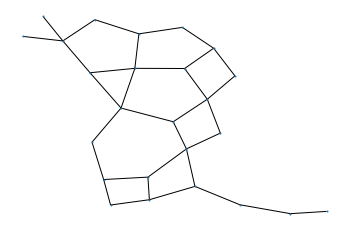

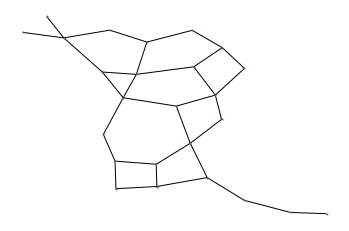

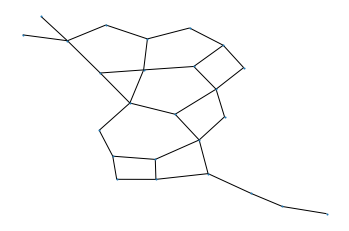

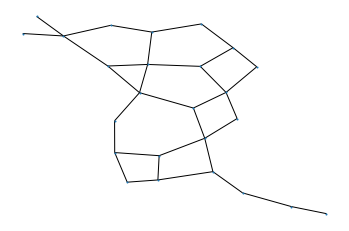

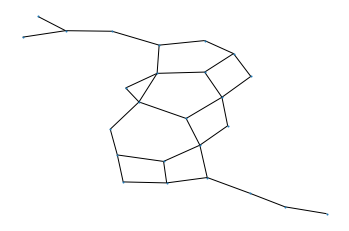

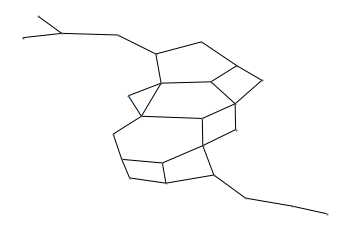

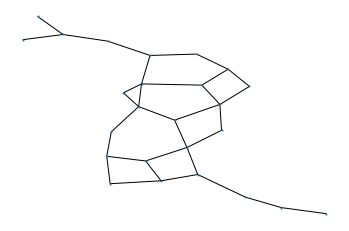

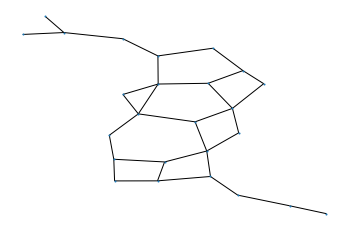

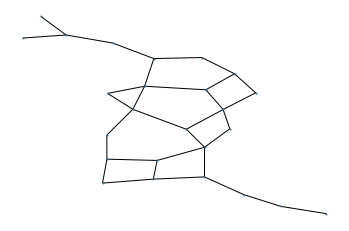

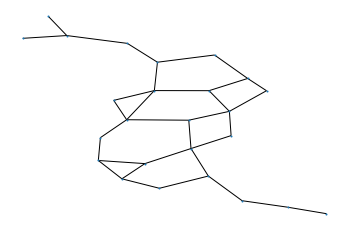

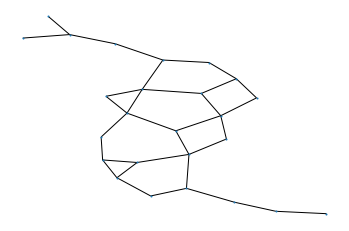

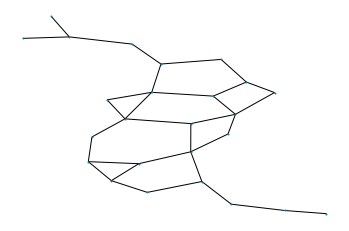

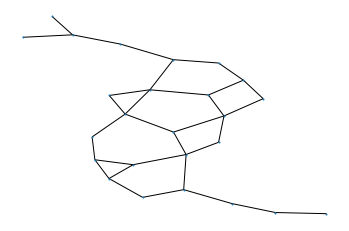

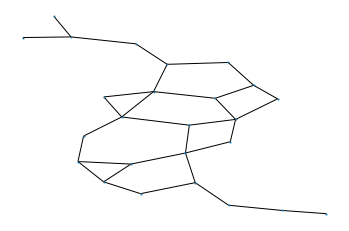

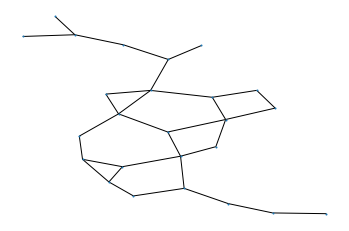

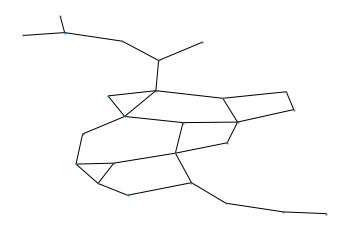

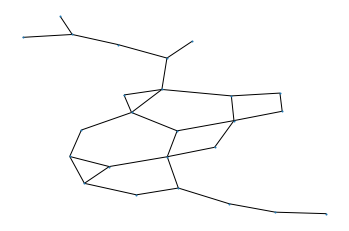

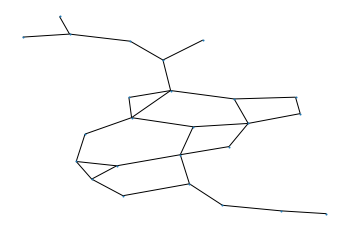

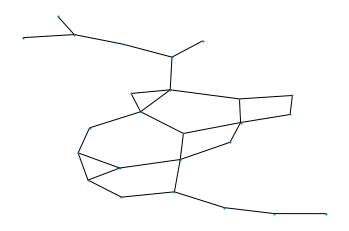

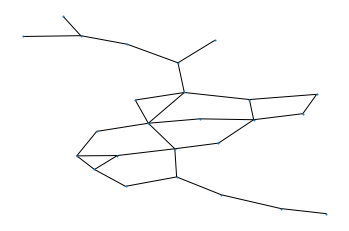

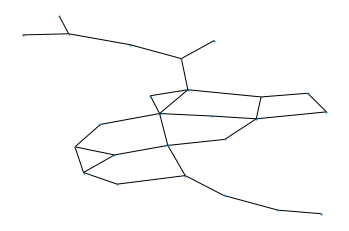

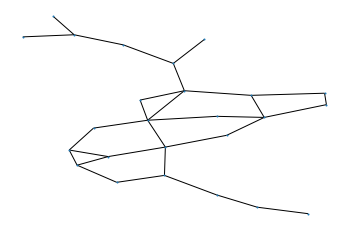

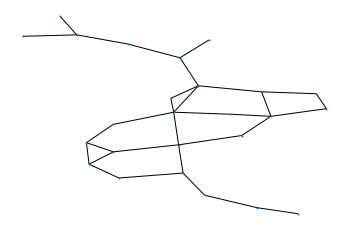

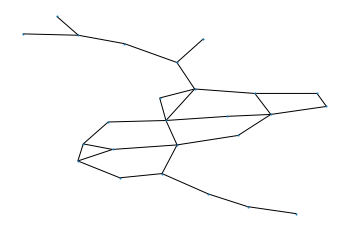

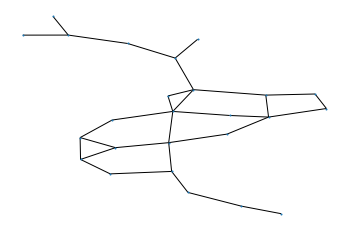

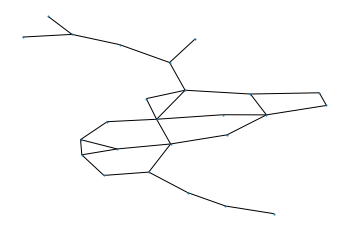

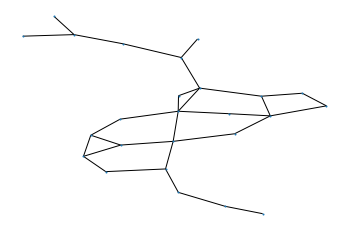

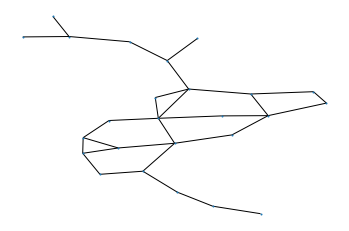

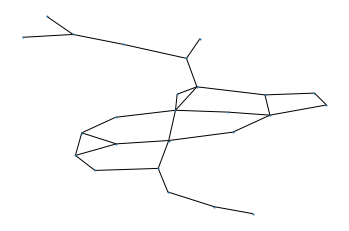

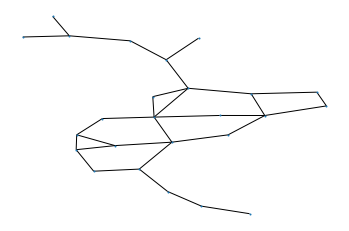

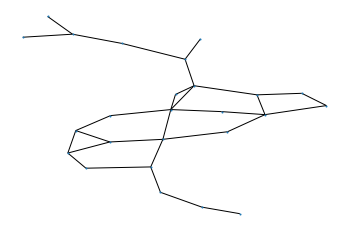

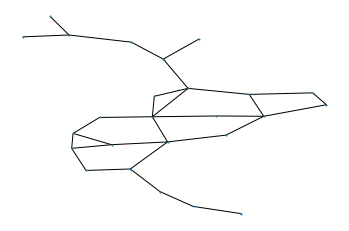

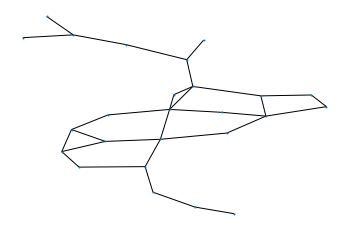

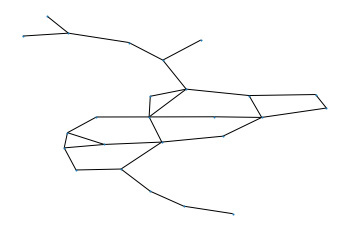

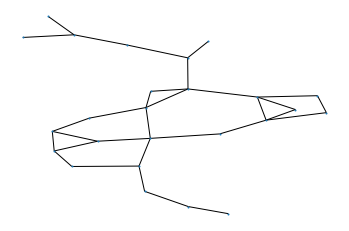

In [181]:
initialize()
for _ in range(100):
    update()
    observe()

In [175]:
import matplotlib

import matplotlib.pyplot as plt
import networkx as nx
import random as rd

m0 = 5 # number of nodes
m = 2 # number of neighbors of each node

def initialize1():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe1():
    global g
    cla()
    nx.draw(g, pos = g.pos)
    plt.show()
    
def pref_select(nds):
    global g
    r = uniform(0,sum(g.degree(i) for i in nds))
    x = 0
    for i in nds:
        x += g.degree(i)
        if r <= x:
            return i
    

def update1():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer,j)
            nds.remove(j)
        g.pos[newcomer] = (0,0)
    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)


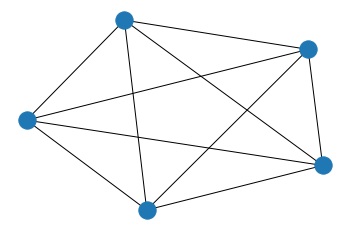

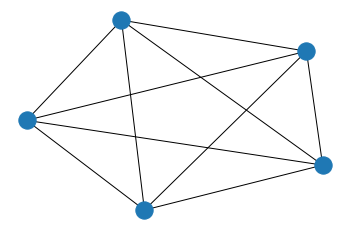

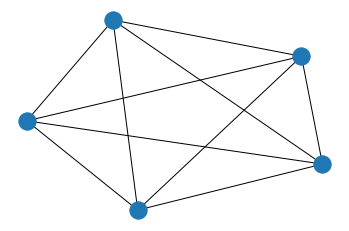

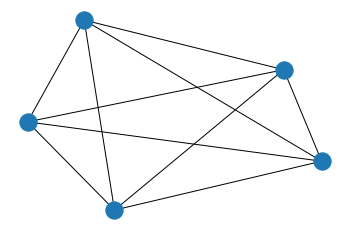

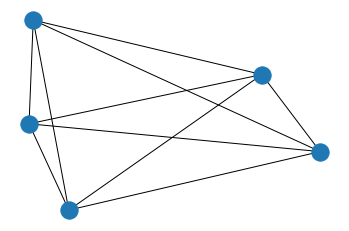

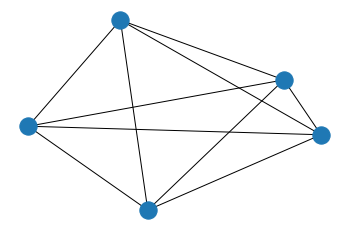

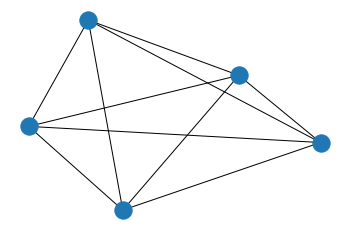

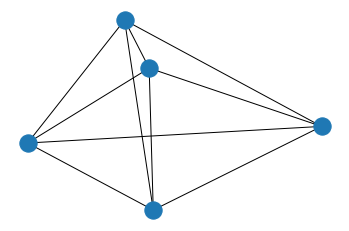

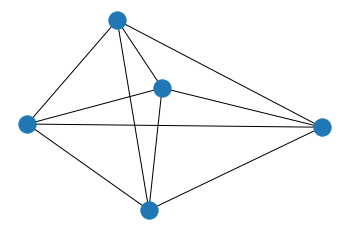

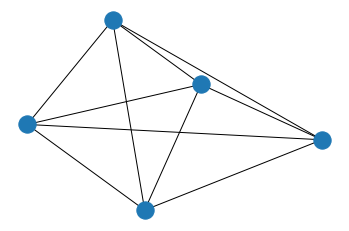

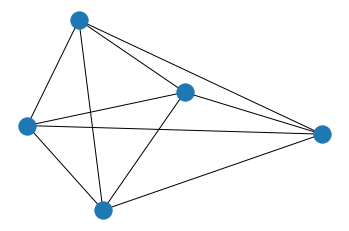

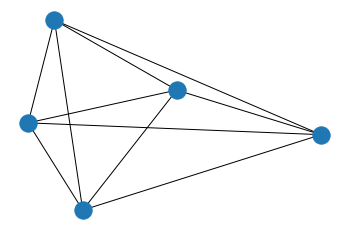

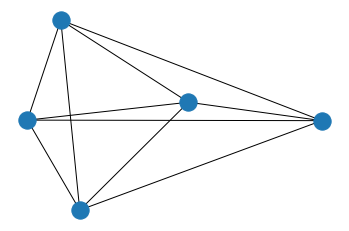

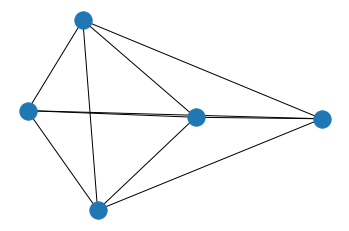

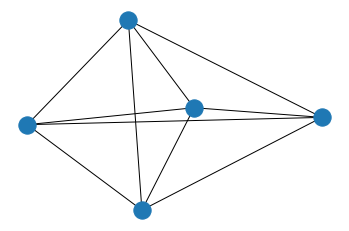

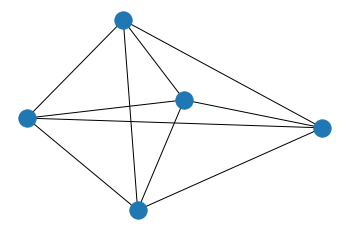

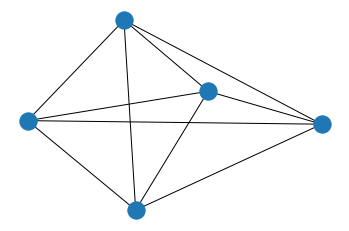

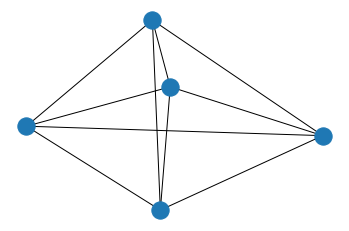

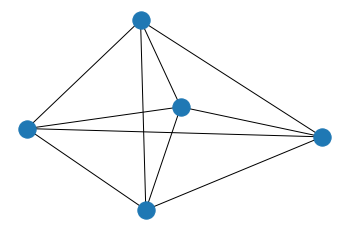

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


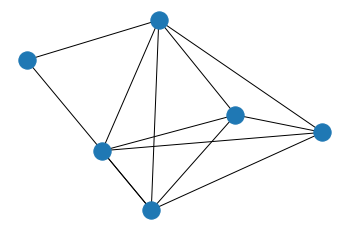

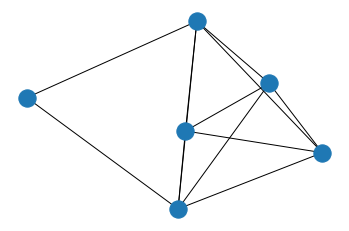

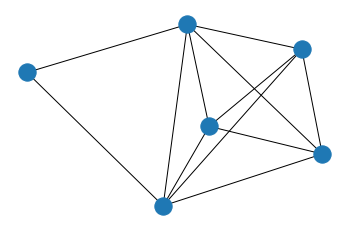

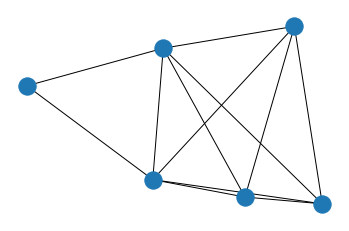

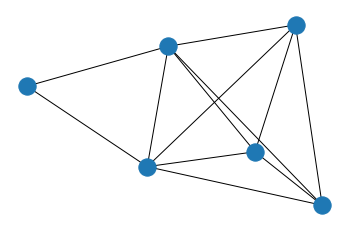

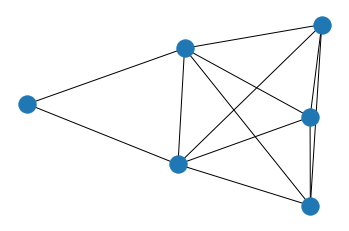

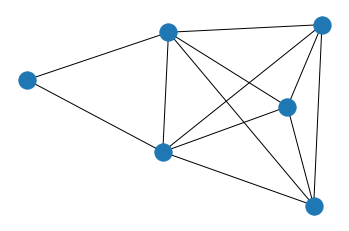

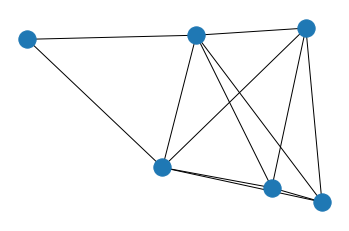

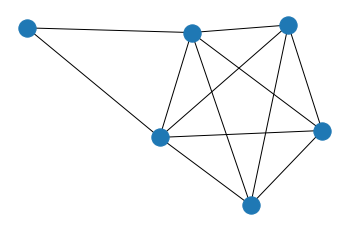

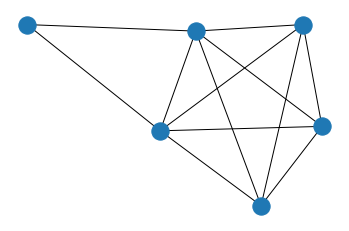

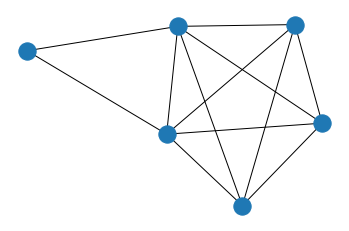

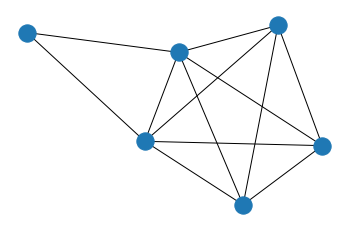

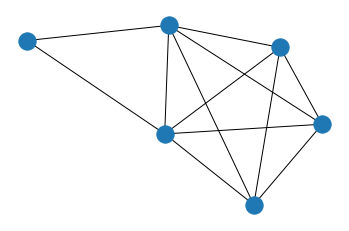

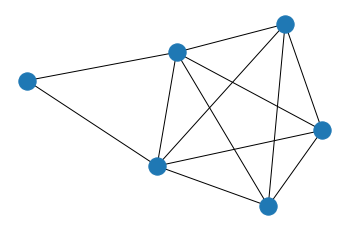

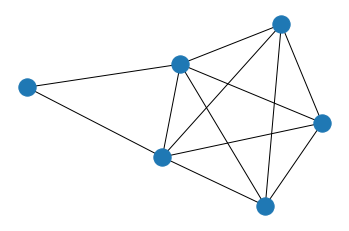

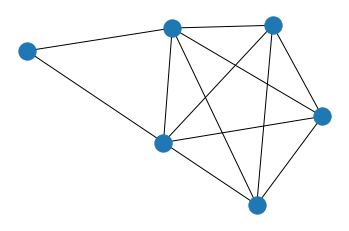

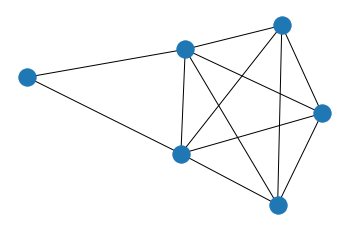

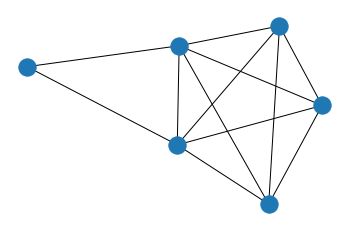

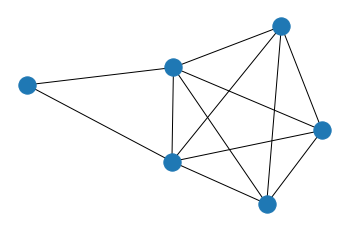

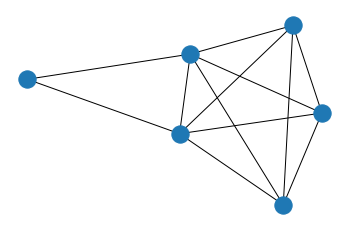

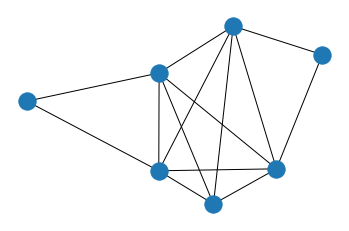

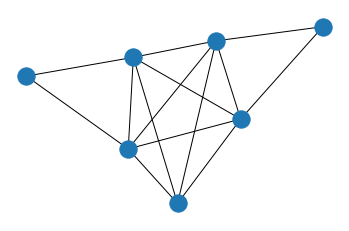

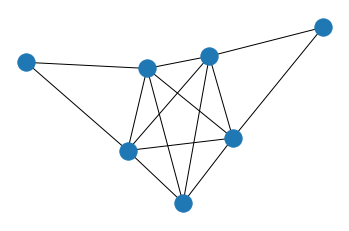

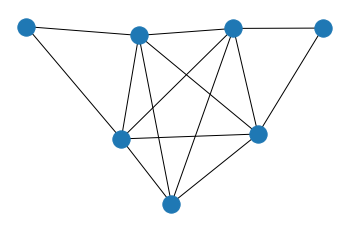

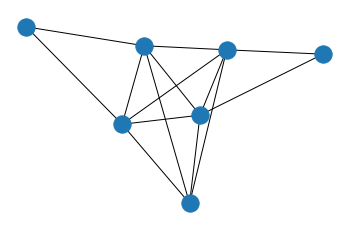

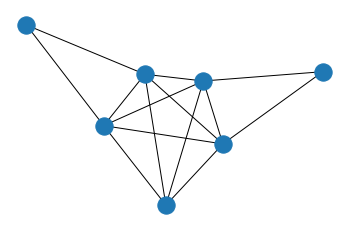

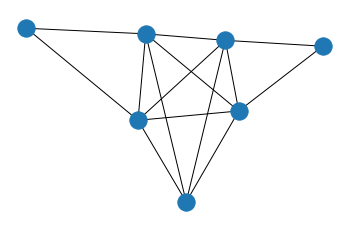

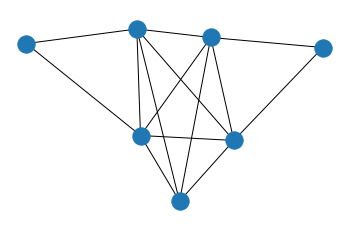

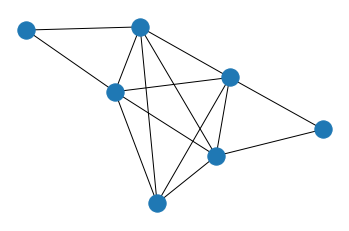

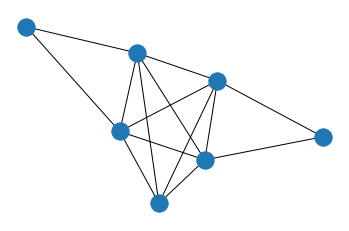

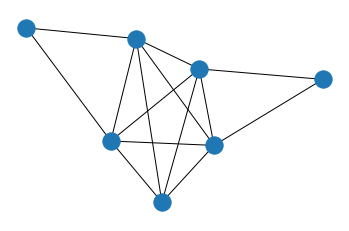

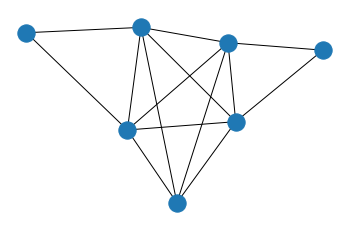

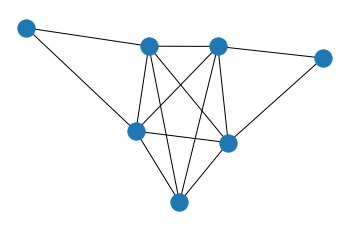

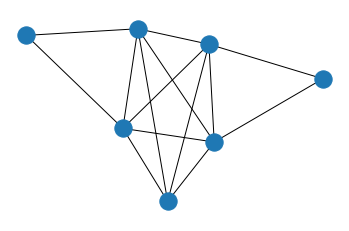

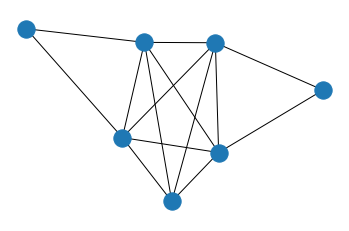

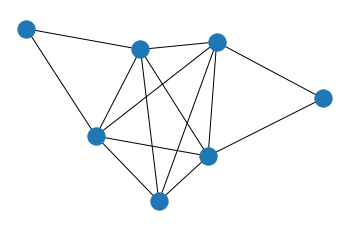

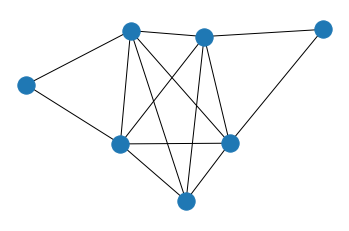

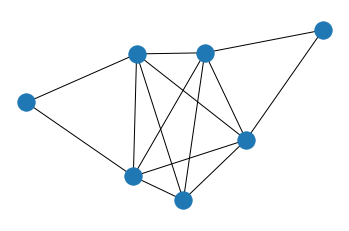

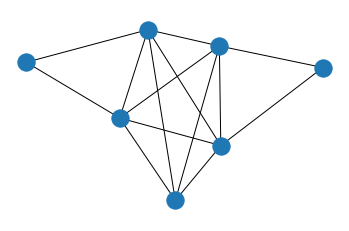

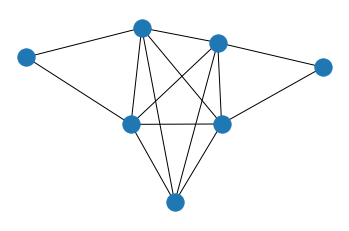

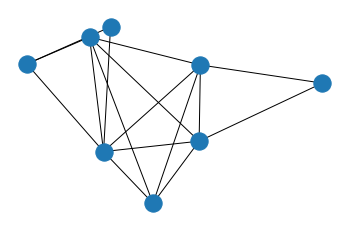

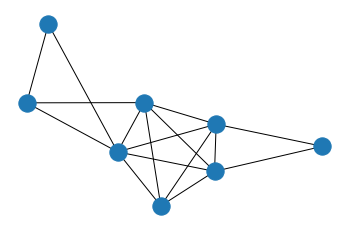

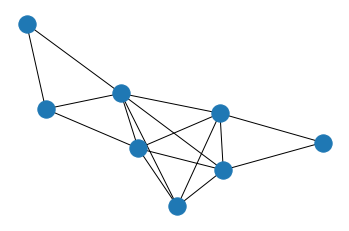

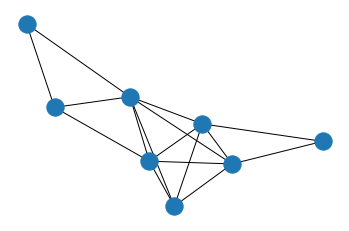

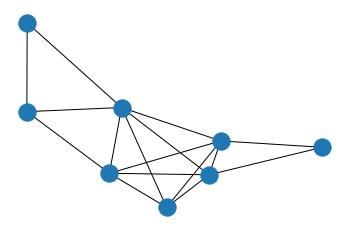

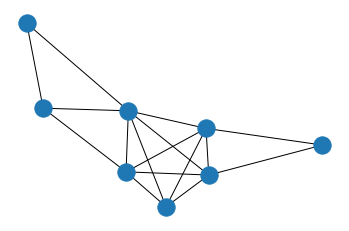

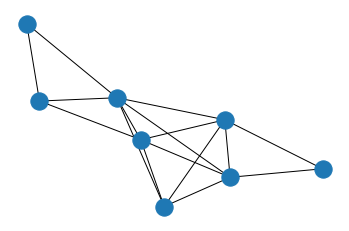

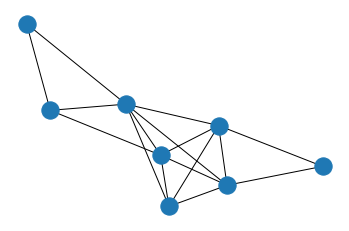

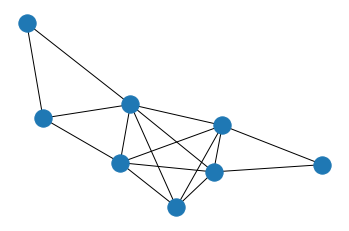

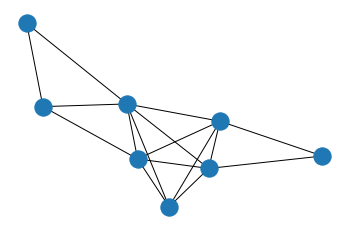

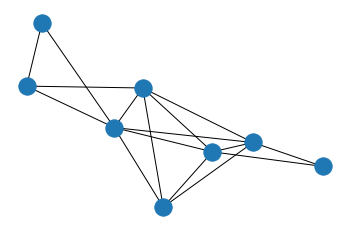

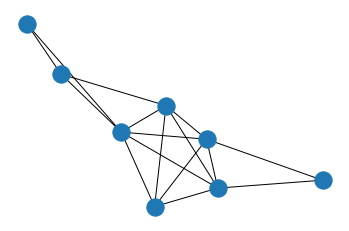

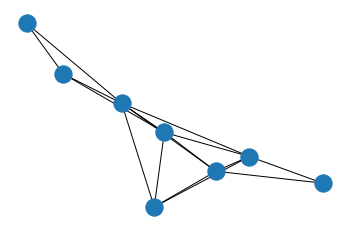

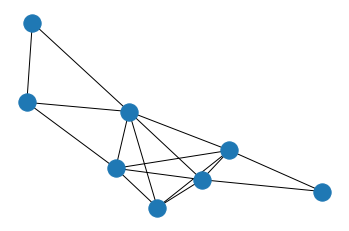

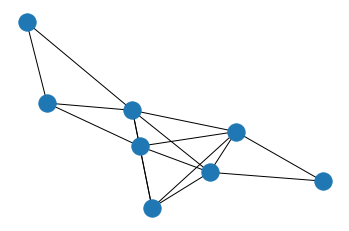

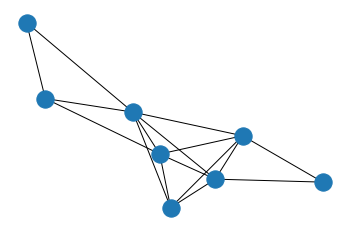

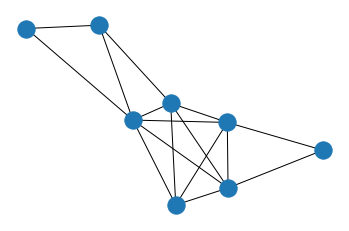

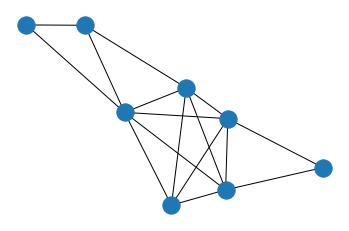

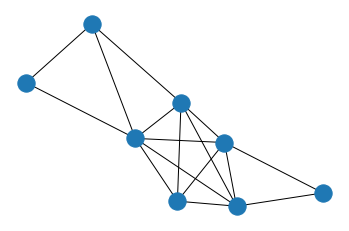

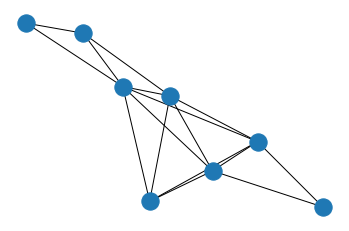

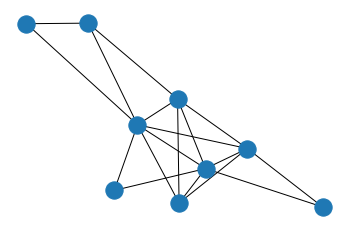

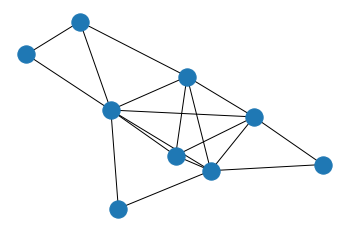

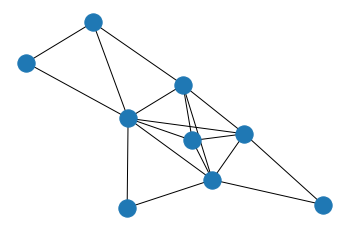

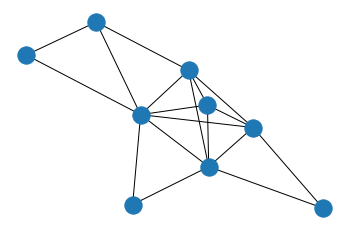

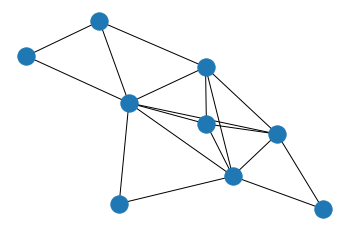

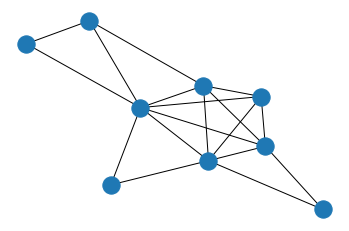

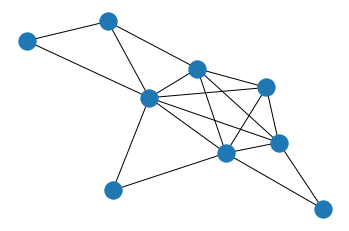

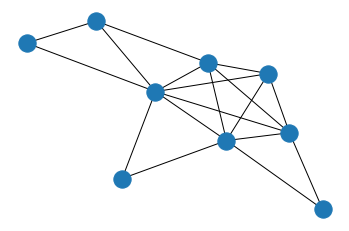

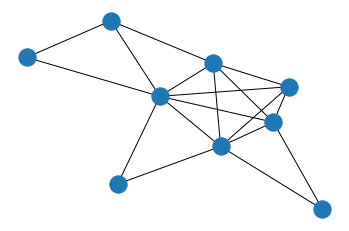

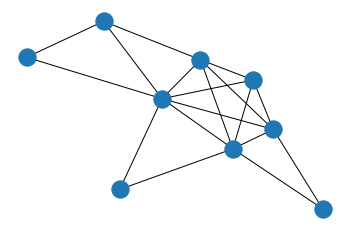

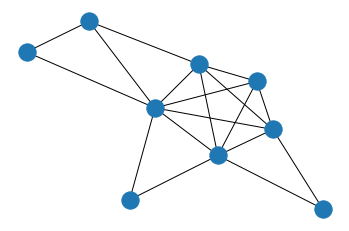

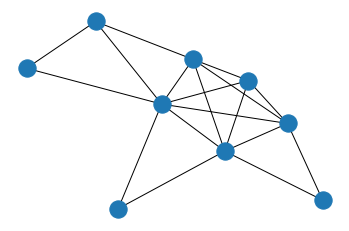

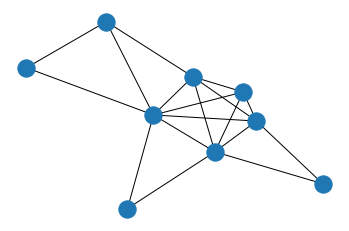

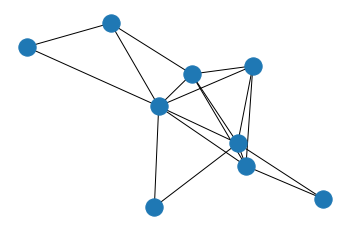

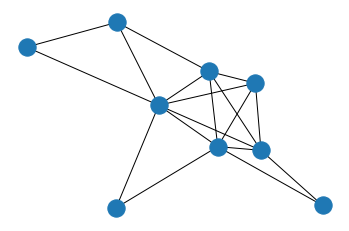

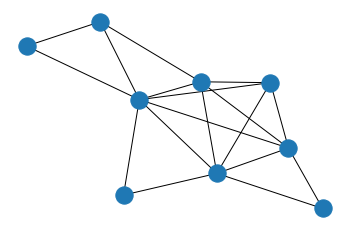

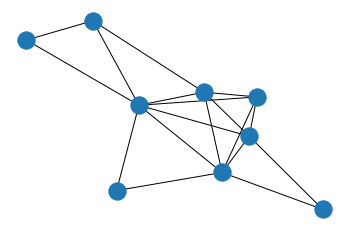

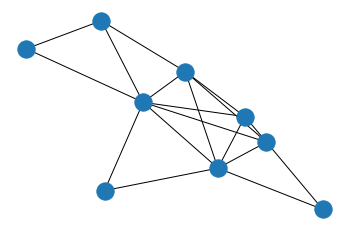

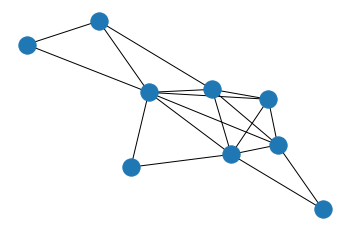

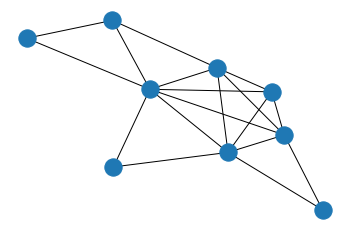

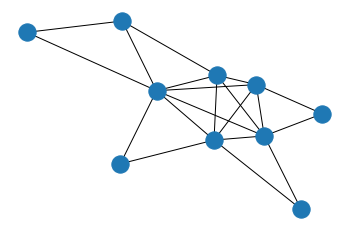

In [179]:
initialize1()
for _ in range(100):
    update1()
    observe1()

In [162]:
# when m increases, the graph becomes more unpredictable as there are more configurations of 2 nodes to chose for a new edge

5.864222990433476